### 1) Image capturing

In [4]:
import cv2


def capturing_image(path):
    # Step 1: Load an image from file path
    image = cv2.imread(path)

    # Step 2: Check if image is loaded correctly
    if image is None:
        print("Error: Unable to load image.")
    else:
        return image


In [5]:
image = capturing_image(r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg')
cv2.imshow("Captured Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


### 2) Dynamic lighting adjustment (brightness/contrast scaling)

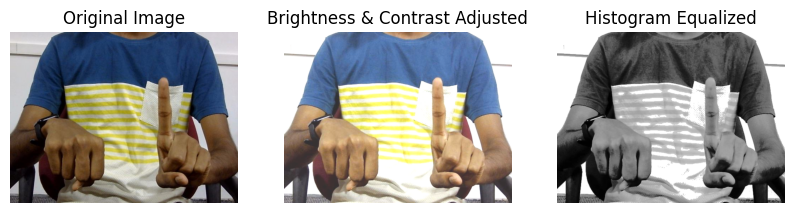

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_contrast(image, brightness=0, contrast=1):
    """
    Adjust the brightness and contrast of the image.
    :param image: Input image (numpy array)
    :param brightness: Value to adjust brightness (positive for brighter, negative for darker)
    :param contrast: Value to adjust contrast (1.0 means no change, <1.0 for less contrast, >1.0 for more contrast)
    :return: Adjusted image
    """
    # Adjust brightness and contrast using the formula
    adjusted_image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
    
    return adjusted_image

def apply_histogram_equalization(image):
    """
    Apply histogram equalization to improve contrast.
    :param image: Input grayscale image (numpy array)
    :return: Image with improved contrast
    """
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    img_eq = cv2.equalizeHist(img_gray)
    
    # Convert back to BGR to show in color
    img_eq_bgr = cv2.cvtColor(img_eq, cv2.COLOR_GRAY2BGR)
    
    return img_eq_bgr

# Load the image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg'
image = cv2.imread(image_path)

# 1. Apply Brightness and Contrast Adjustment
brightness = 50  # Example: increase brightness by 50
contrast = 1.2   # Example: increase contrast by 20%

adjusted_image = adjust_brightness_contrast(image, brightness=brightness, contrast=contrast)

# 2. Apply Histogram Equalization to improve contrast
image_with_hist_eq = apply_histogram_equalization(adjusted_image)

# Display the images using Matplotlib (you can replace with cv2.imshow() if GUI support is available)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Adjusted Image (Brightness/Contrast)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
plt.title("Brightness & Contrast Adjusted")
plt.axis('off')

# Image with Histogram Equalization
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_with_hist_eq, cv2.COLOR_BGR2RGB))
plt.title("Histogram Equalized")
plt.axis('off')

plt.show()


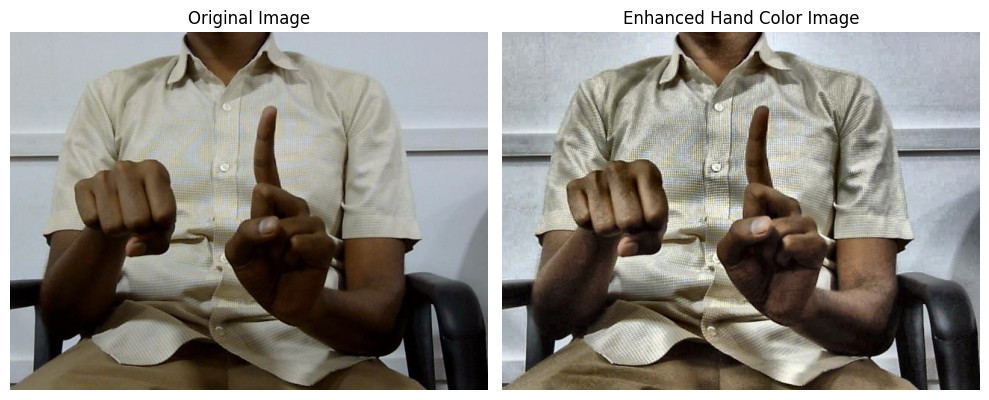

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_hist_eq_to_hand_color(image):
    """
    Apply histogram equalization to enhance contrast while preserving the hand's color in the image.
    The enhancement is done on the L channel in the LAB color space.
    :param image: Input image (numpy array)
    :return: Image with enhanced contrast and preserved hand color
    """
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into its channels: L (Lightness), A, and B
    l, a, b = cv2.split(lab_image)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L (Lightness) channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))  # Adjusted clipLimit
    l_clahe = clahe.apply(l)

    # Merge the CLAHE enhanced L channel with the original A and B channels
    lab_clahe = cv2.merge([l_clahe, a, b])

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Load the image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_003.jpg'
image = cv2.imread(image_path)

# Apply histogram equalization with CLAHE to enhance hand contrast
image_with_enhanced_hand_color = apply_hist_eq_to_hand_color(image)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_enhanced_hand_color_rgb = cv2.cvtColor(image_with_enhanced_hand_color, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(image_with_enhanced_hand_color_rgb)
plt.title("Enhanced Hand Color Image")
plt.axis('off')

plt.tight_layout()
plt.show()


### 3) Background removal or blurring (for clutter reduction).

In [16]:
import cv2
import numpy as np

def blur_background_on_motion():
    """
    Capture video from webcam and blur the background based on motion detected between successive frames.
    """
    # Initialize video capture
    cap = cv2.VideoCapture(0)

    # Initialize variables for frame differencing
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Could not read from webcam.")
        return

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    while True:
        # Capture the current frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read from webcam.")
            break

        # Convert the current frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute the absolute difference between the current and previous frame
        frame_diff = cv2.absdiff(prev_gray, gray)

        # Apply threshold to highlight areas of motion
        _, motion_mask = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

        # Apply morphological operations to clean up the motion mask
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        motion_mask = cv2.morphologyEx(motion_mask, cv2.MORPH_CLOSE, kernel)

        # Create an inverted mask for the background
        background_mask = cv2.bitwise_not(motion_mask)

        # Blur the entire frame
        blurred_frame = cv2.GaussianBlur(frame, (21, 21), 0)

        # Combine the motion areas with the original frame and blur the background
        motion_areas = cv2.bitwise_and(frame, frame, mask=motion_mask)
        background_areas = cv2.bitwise_and(blurred_frame, blurred_frame, mask=background_mask)
        output_frame = cv2.add(motion_areas, background_areas)

        # Display the result
        cv2.imshow("Motion-Based Background Blur", output_frame)

        # Update the previous frame
        prev_gray = gray

        # Break on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and close windows
    cap.release()
    cv2.destroyAllWindows()

# Run the function
blur_background_on_motion()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


### 4) Noise removal

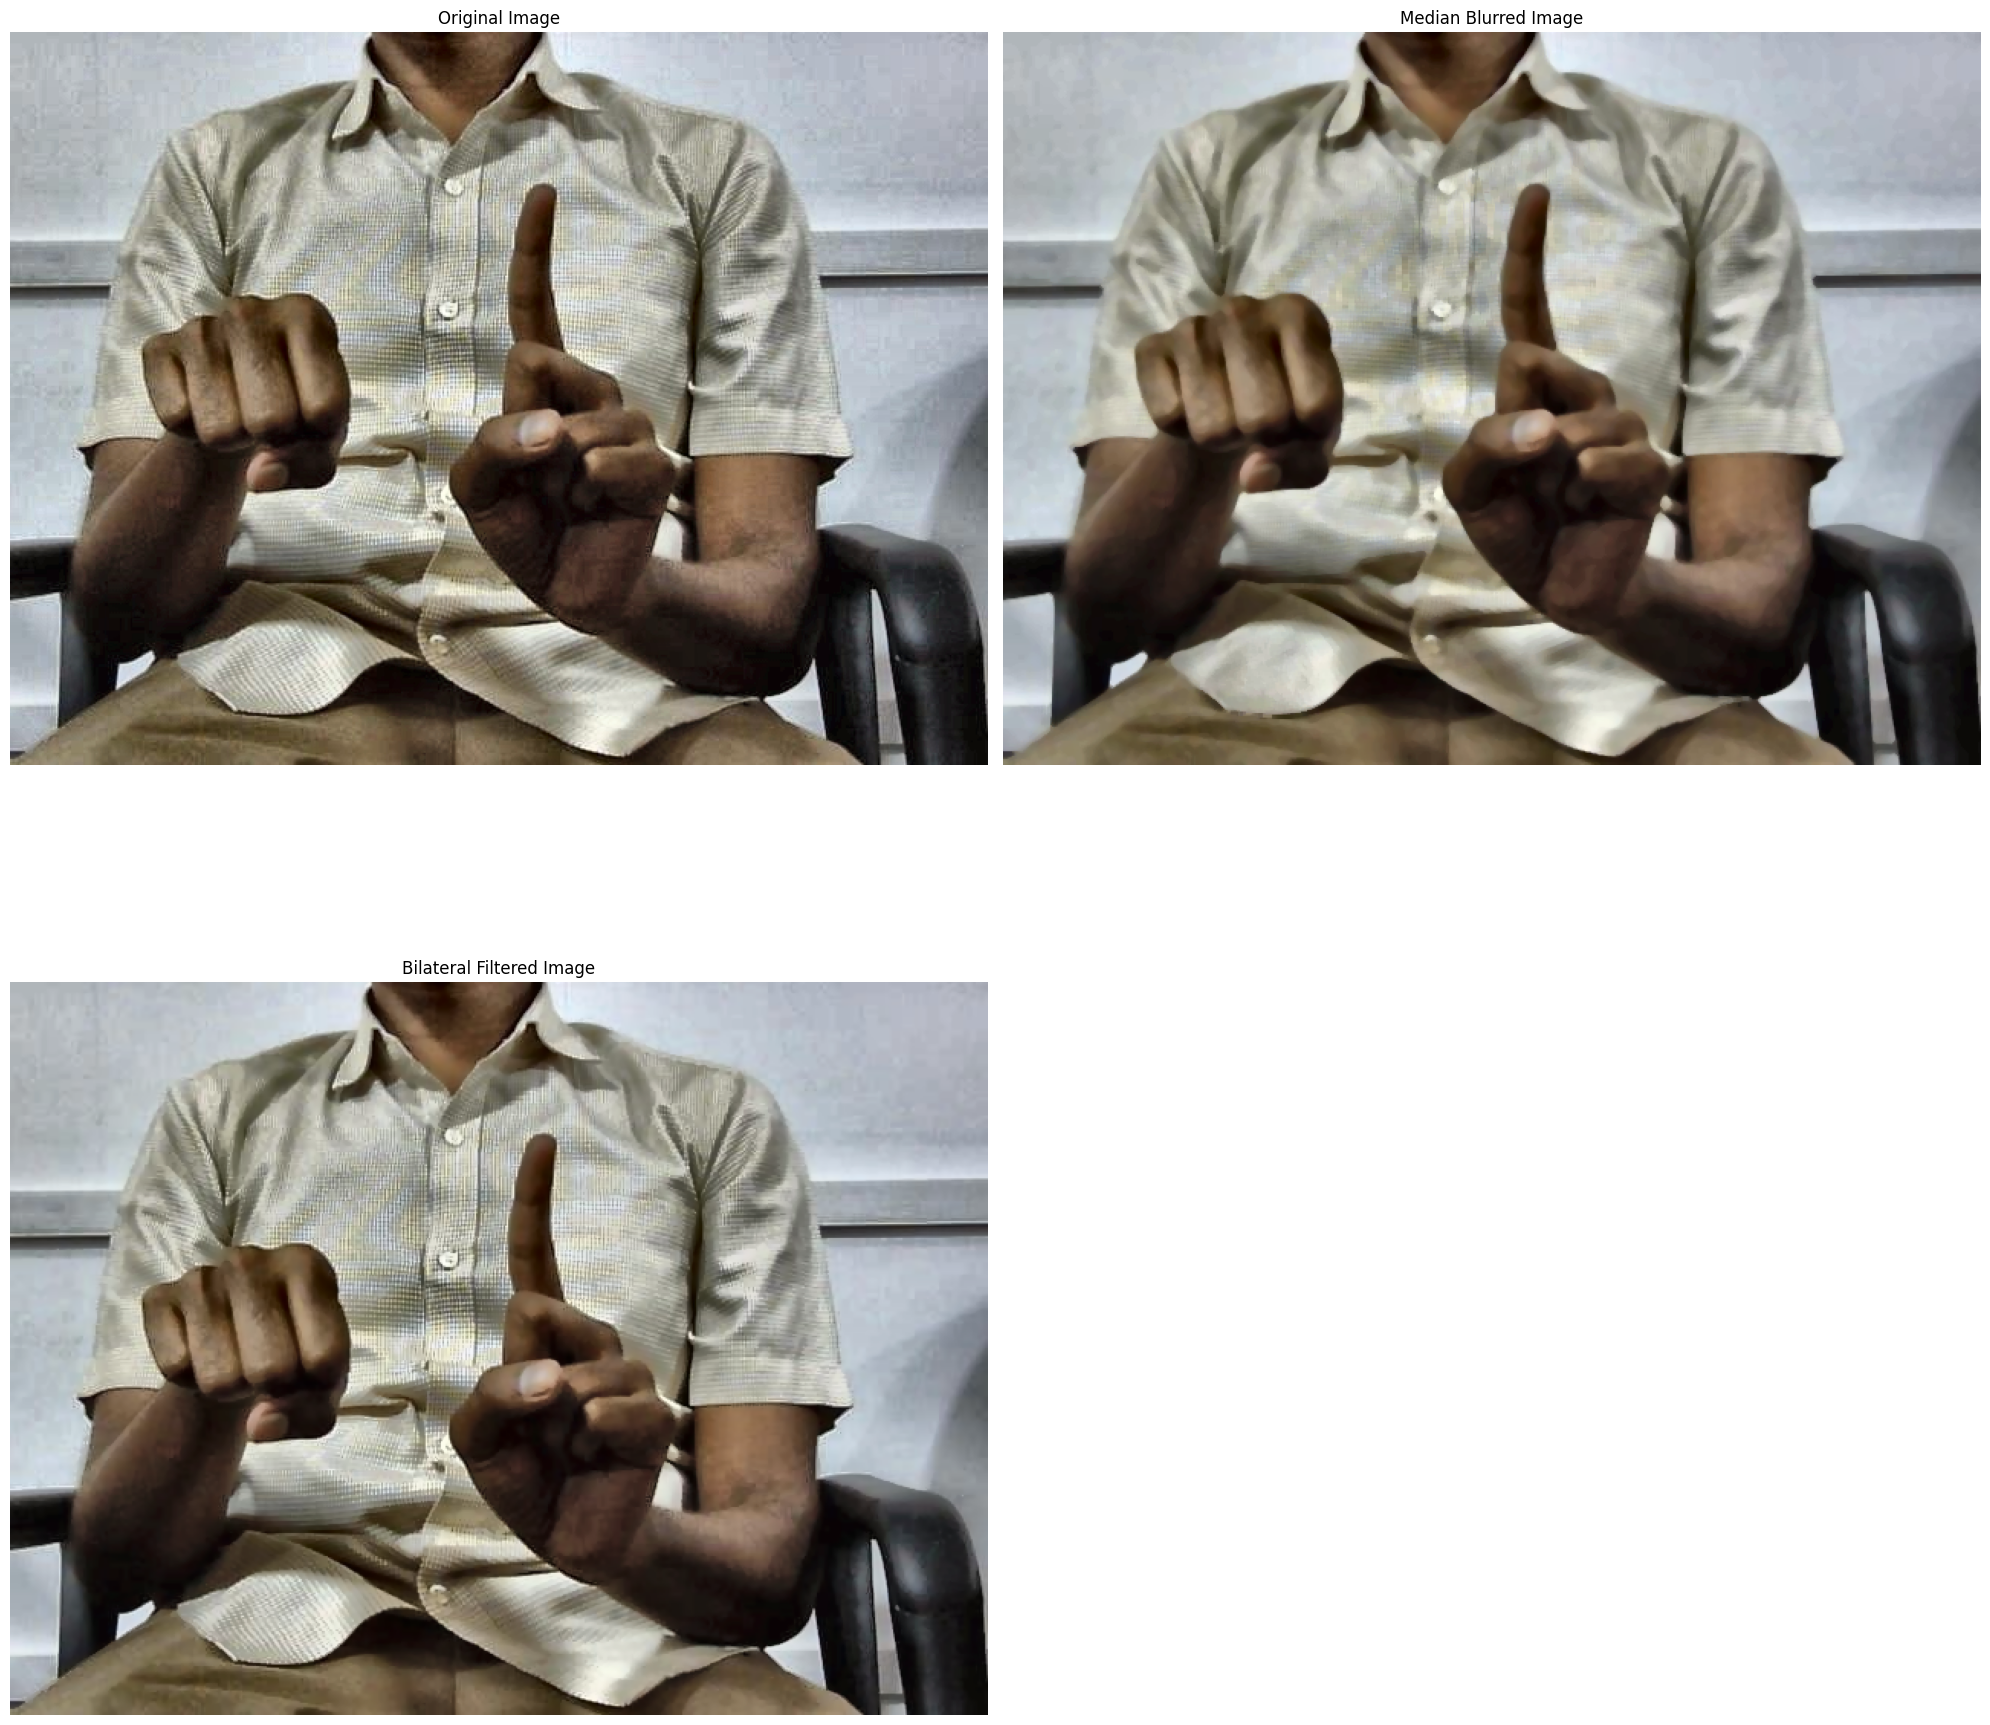

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_median_and_bilateral_filter(image):
    """
    Apply median blur and bilateral filter for noise reduction.
    :param image: Input image (numpy array)
    :return: Images after applying median blur and bilateral filter
    """
    # Apply median blur (kernel size of 5; must be odd)
    median_blurred = cv2.medianBlur(image, 5)

    # Apply bilateral filter
    # Diameter: 15, SigmaColor: 75, SigmaSpace: 75 (can be tuned)
    bilateral_filtered = cv2.bilateralFilter(image, d=5, sigmaColor=25, sigmaSpace=25)

    return median_blurred, bilateral_filtered

# Load the image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg'
# image = cv2.imread(image_path)
image = image_with_enhanced_hand_color_rgb

# Convert the image from BGR to RGB for proper visualization with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply filters
median_blurred, bilateral_filtered = apply_median_and_bilateral_filter(image_rgb)

# Convert filtered images to RGB for visualization
median_blurred_rgb = cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB)
bilateral_filtered_rgb = cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB)

# Display the results using Matplotlib
plt.figure(figsize=(20,20))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Median blur result
plt.subplot(2, 2, 2)
plt.imshow(median_blurred_rgb)
plt.title("Median Blurred Image")
plt.axis('off')

# Bilateral filter result
plt.subplot(2, 2, 3)
plt.imshow(bilateral_filtered_rgb)
plt.title("Bilateral Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()


### 5) Normalizing pixel values

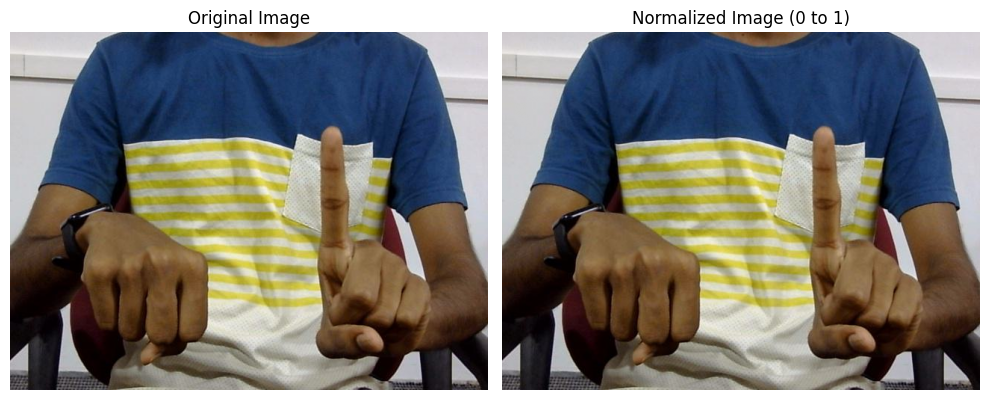

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize_image(image):
    """
    Normalize pixel values of an image to the range [0, 1].

    Args:
        image (numpy.ndarray): Input image (in BGR format).
    
    Returns:
        numpy.ndarray: Normalized image (in RGB format) with pixel values scaled to [0, 1].
    """
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Normalize pixel values to the range [0, 1]
    normalized_image = image_rgb / 255.0

    return normalized_image

# Load an example image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image.")
else:
    # Normalize the image
    normalized_image = normalize_image(image)
    
    # Display the images using Matplotlib
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Original Image")
    plt.axis('off')

    # Normalized image
    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image)
    plt.title("Normalized Image (0 to 1)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### 6) Edge enhancement (Laplacian and Sobel filters)

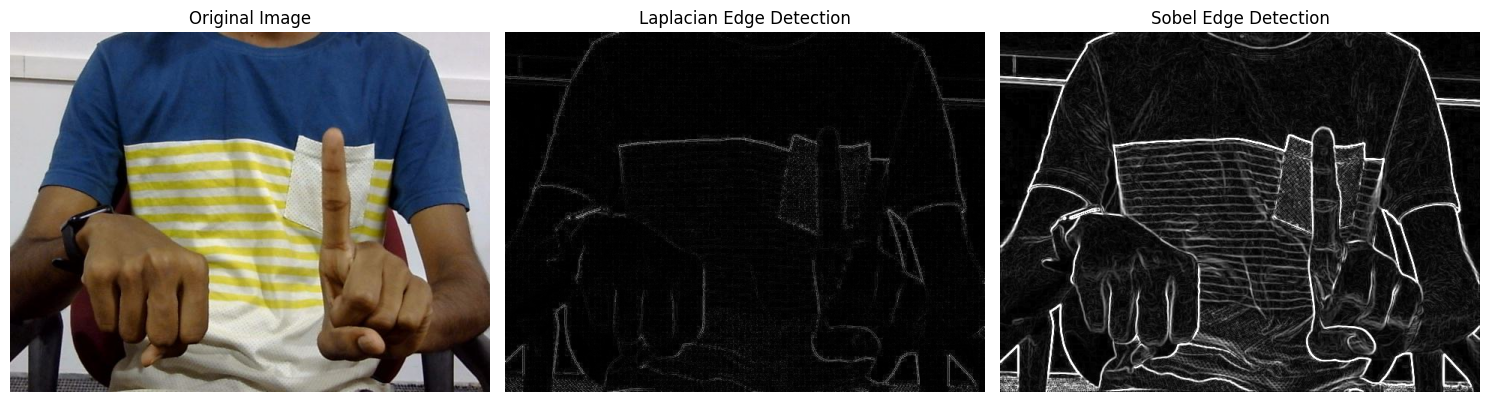

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_laplacian_edge_detection(image):
    """
    Apply Laplacian edge detection to the input image.
    :param image: Input image (numpy array)
    :return: Laplacian edge-detected image
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F)  # Apply Laplacian filter
    laplacian_edges = cv2.convertScaleAbs(laplacian_edges)  # Convert back to uint8 format
    return laplacian_edges

def apply_sobel_edge_detection(image):
    """
    Apply Sobel edge detection to the input image.
    :param image: Input image (numpy array)
    :return: Sobel edge-detected image
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel filter in x direction
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter in y direction
    sobel_edges = cv2.sqrt(sobel_x**2 + sobel_y**2)  # Combine both x and y Sobel results
    sobel_edges = cv2.convertScaleAbs(sobel_edges)  # Convert back to uint8 format
    return sobel_edges

# Load the image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg'
image = cv2.imread(image_path)

# Apply Laplacian and Sobel edge detection
laplacian_image = apply_laplacian_edge_detection(image)
sobel_image = apply_sobel_edge_detection(image)

# Convert original image from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
laplacian_image_rgb = cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2RGB)
sobel_image_rgb = cv2.cvtColor(sobel_image, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 3, 2)
plt.imshow(laplacian_image_rgb)
plt.title("Laplacian Edge Detection")
plt.axis('off')

# Sobel edge-detected image
plt.subplot(1, 3, 3)
plt.imshow(sobel_image_rgb)
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


### 7) Gabor Filter (Fine detail emphasizing)

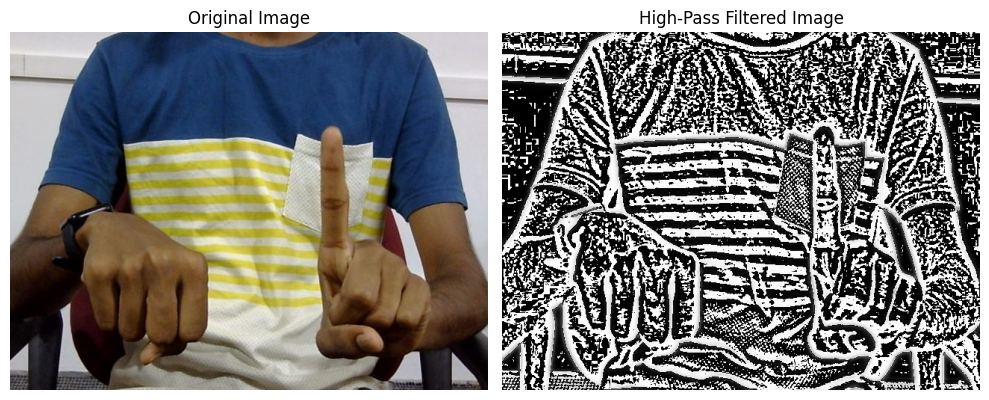

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_high_pass_filter(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to create a low-pass filter
    blurred_image = cv2.GaussianBlur(gray_image, (21, 21), 0)

    # Subtract the blurred image from the original image to get the high-pass filter result
    high_pass_image = gray_image - blurred_image

    # Normalize the result to the 0-255 range
    high_pass_image = np.clip(high_pass_image, 0, 255).astype(np.uint8)

    return high_pass_image

# Load the image
image_path = r'D:\Yr2\DSGP\Virtual Environment\DSGP\TamilDataset\TamilDataset\tsl-a\img_008.jpg'
image = cv2.imread(image_path)

# Apply the high-pass filter
high_pass_image = apply_high_pass_filter(image)

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# High-pass filtered image
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()
